<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/seirs_basico_discreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Parâmetros do modelo
beta = 0.5 # Taxa de transmissão
sigma = 1/7 # Incubação
gamma = 1/5 # Recuperação
omega = 1/365 # Imunidade
N = 10000 # População total
delta_t = 1. # Passo de tempo igual a 1 dia
T = 5*365 # Comprimento da simulação (dias)

# Inicialização das variáveis
passos = int(T / delta_t) + 1 # Inclui o ponto inicial
S = np.zeros(passos)
E = np.zeros(passos)
I = np.zeros(passos)
R = np.zeros(passos)
tempo = np.linspace(0, T, passos) # Vetor de tempo

# Condições iniciais
E[0] = 10. # Número inicial de expostos
I[0] = 0.0 # Número inicial de infectados
S[0] = N-E[0]-I[0] # Número inicial de suscetíveis
R[0] = 0.0 # Número inicial de recuperados

In [59]:
# Iterações com equações de diferenças
for t in range(passos - 1):
  S[t+1]=S[t]+(-beta*S[t]*I[t]/N+omega*R[t])*delta_t
  E[t+1]=E[t]+(beta*S[t]*I[t]/N-sigma*E[t])*delta_t
  I[t+1] =I[t]+(sigma*E[t]-gamma*I[t])*delta_t
  R[t+1]=R[t]+(gamma*I[t]-omega*R[t])*delta_t

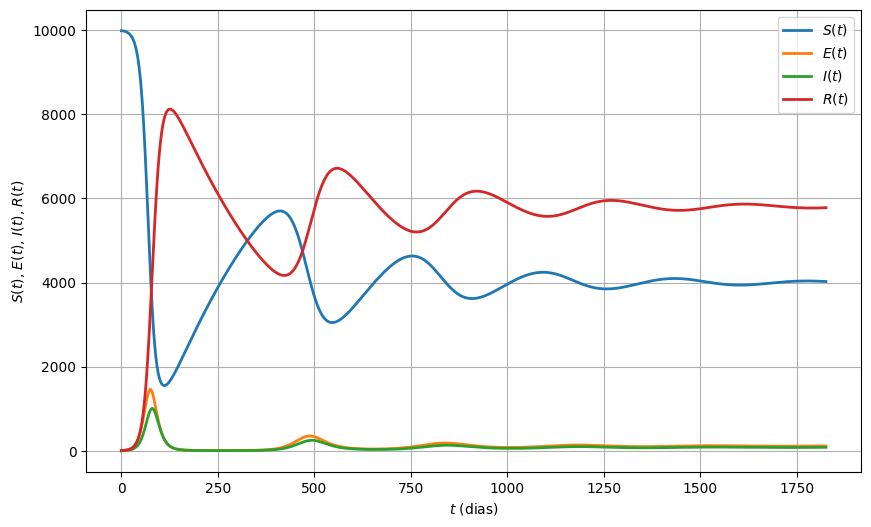

In [60]:
# Gráfico
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(tempo, S, label="$S(t)$", lw=2)
plt.plot(tempo, E, label="$E(t)$", lw=2)
plt.plot(tempo, I, label="$I(t)$", lw=2)
plt.plot(tempo, R, label="$R(t)$", lw=2)
plt.xlabel("$t$ (dias)")
plt.ylabel("$S(t)$, $E(t)$, $I(t)$, $R(t)$")
plt.legend()
plt.grid()
plt.savefig("seirs5.png", dpi=300)  # Salvar em alta resolução
plt.show()

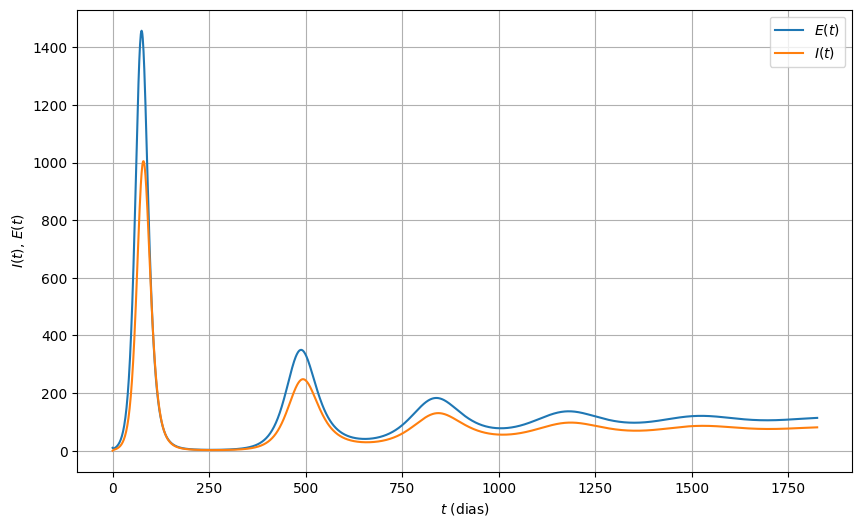

In [61]:
# Gráfico para I(t) e E(t) somente
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(tempo, E, label="$E(t)$", lw=1.5)
plt.plot(tempo, I, label="$I(t)$", lw=1.5)
plt.xlabel("$t$ (dias)")
plt.ylabel("$I(t)$, $E(t)$")
plt.legend()
plt.grid()
plt.savefig("seirs6.png", dpi=300)  # Salvar em alta resolução
plt.show()

In [62]:
# Valores de equilíbrio para E(t) I(t) em % da população:
# Valores de equilíbrio para E(t) I(t) em % da população:
print(round(E[-1]*100/N,1))
print(round(I[-1]*100/N,1))

1.1
0.8


In [63]:
# Definição da função derivada
def derivada(y,x):
   dy = np.zeros_like(y, dtype=float)
   dx = x[1] - x[0]
   dy[:-1] = (y[1:] - y[:-1])
   dy[-1] = (y[-1] - y[-2]) # diferenca atrasada para o ultimo termo
   return dy/dx

In [64]:
# Array para a derivada de I
dI_dt = derivada(I,tempo)
dI_dt

array([1.42857143, 0.93877551, 0.67803207, ..., 0.04489101, 0.04413505,
       0.04413505])

In [65]:
# Determinação dos instantes nos quais I tem extremo
extremos = tempo[1:][dI_dt[1:]*dI_dt[:-1]<0]
extremos

array([  80.,  260.,  493.,  658.,  844., 1011., 1187., 1356., 1529.,
       1700.])

In [66]:
# Array com índices pares somente (máximos)
maximos = extremos[::2]
maximos

array([  80.,  493.,  844., 1187., 1529.])

In [67]:
# Diferenças entre os valores sucessivo de maximos
np.diff(maximos)

array([413., 351., 343., 342.])